<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=3> Daniel García Hernández </font> <br> <br>
<center><font color=#555555><font size=3> Lizbeth Alejandra Barragán Vázquez </font> <br> <br>
<center><font color=#555555><font size=3> Chelsi Arelí Sedano Gómez </font> <br> <br>
    
<center> <font color= #555555> <font size = 4> Octubre 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/labv98/MyST_LAB_5_E1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 5 </font> <br> <br> <font color= #555555> <font size = 5> Proyecto Final Análisis Técnico  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

# <font color= #6B6B6B> <font size = 5> Objetivos </font>

<font size = 3>**Objetivo general:**  </font>

Este laboratorio tiene como propósito 

<font size = 3>**Objetivos específicos:**</font>

* 

* 

* 

* 

# Info

**4 criterios financieros**

1. Uso de datos - Instrumento utilizado - Granularidad - Validaciones históricas(no)
2. Análisis técnico
3. Fijar el sl y tp
4. Cantdad de capital utilizado para realizar la operación.


**5 validaciones gráficas**
1. Precio
2. Exposure
3. Profit
4. Stoploss con close
5. Takeprofit con close

**3 MAD**
1. Sharpe Ratio Original:
    rp: Promedio de los rendimientos logarítmicos de profit_acm_d
    rf: 5%
    sdp: Desviación estándar de todos los rendimientos con los que se calculó rp.
2. DrawDown (Capital):
    Minusvalia máxima que se registró en la evolución de los valores (de 'profit_acm_d').
    Obtener información de esta métrica como la siguiente:
    "Fecha Inicial", "Fecha Final", "DrawDown (capital)".
3. DrawUp (Capital):
    Plusvalía máxima que se registró en la evolución de los valores (de 'profit_acm_d').
    Obtener información de esta métrica como la siguiente:
    "Fecha Inicial", "Fecha Final", "DrawUp (capital)".

**Estudios técnicos**
1. BB
2. MA

**Generación de señal de compra o de venta**
- Incluir definiciones cortas de cada estudio

**5 validaciones visuales del algoritmo de decision utilizando estudios técnicos**

<br>

# <font color= #6B6B6B> 2. Instalar Paqueterías y Dependencias</font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Paqueterías de python </font> <font color= #555555>

- fire==0.4.0

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
# Para que no aparezcan los warnings
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
#Librerias
import pandas as pd
import numpy as np
import datetime

from datetime import date


# Import PySwarms
#import pyswarms as ps

In [3]:
# Gráficas
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

<br>

# <font color= #6B6B6B> 3. Desripción de los datos </font>

<hr style="border:0.02in solid gray"> </hr>

In [26]:
# Bajar la base de datos excel
df = pd.read_excel('Historicos_backtest.xlsx', index_col=0)
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-01-02 00:00:00,1.20087,1.20095,1.20007,1.20090,705,16,155200000
1,2018-01-02 00:15:00,1.20090,1.20094,1.20034,1.20058,1083,19,216600000
2,2018-01-02 00:30:00,1.20059,1.20160,1.20058,1.20135,969,18,193800000
3,2018-01-02 00:45:00,1.20135,1.20141,1.20125,1.20130,1234,20,246800000
4,2018-01-02 01:00:00,1.20130,1.20139,1.20019,1.20137,4787,18,957400000
...,...,...,...,...,...,...,...,...
24740,2018-12-31 05:00:00,1.14348,1.14360,1.14337,1.14338,2825,15,423750000
24741,2018-12-31 05:15:00,1.14338,1.14367,1.14337,1.14365,3115,15,467250000
24742,2018-12-31 05:30:00,1.14365,1.14392,1.14356,1.14392,3730,15,559500000
24743,2018-12-31 05:45:00,1.14392,1.14402,1.14363,1.14378,3675,15,551250000


# Sistemas de trading

In [54]:
# Cost Function backtest
def function(num_acciones, pp_ma, w_bb, sd_bb):
    #print(variable)
    #num_acciones = variable.item(0)
    #pp_ma = variable.item(1)
    pg_ma = pp_ma
    w_bb = int(w_bb)
    #w_bb = int(variable.item(2))
    #sd_bb = variable.item(3)
    print(num_acciones, pp_ma, pg_ma, w_bb, sd_bb)

    df = pd.read_excel('Historicos_backtest.xlsx', index_col=0)
    ma_df= df.copy()
    bb_df= df.copy()
    ### MOVING AVERAGE 
    ma_df['moving_average_short'] = ma_df['close'].rolling(window=20).mean()
    ma_df['moving_average_long'] = ma_df['close'].rolling(window=50).mean()
    # Obtener las columnas necesarias 
    final_ma = ma_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb = bb_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb['Operation'] = np.nan
    ## BOLLINGER BANDS
    bb_df['moving_average'] = bb_df['close'].rolling(window=w_bb).mean()
    bb_df['standar_deviation'] = bb_df['close'].rolling(window=w_bb).std()
    bb_df['boolinger_upper'] = bb_df['moving_average'] + (bb_df['standar_deviation'] * sd_bb)
    bb_df['boolinger_lower'] = bb_df['moving_average'] - (bb_df['standar_deviation'] * sd_bb)
    
    ### Constantes 
    Capital= 100000
    hoy = pd.Timestamp(datetime.datetime.today())
    save_time_venta= ma_df['time'][0] - datetime.timedelta(hours=2)
    save_time_compra= ma_df['time'][0] - datetime.timedelta(hours=2)

    for t in range(1, len(ma_df)):
        # For Moving Average
        ## Compras
        if (ma_df.loc[t-1, 'moving_average_short'] < ma_df.loc[t-1, 'moving_average_long'] and
            ma_df.loc[t, 'moving_average_short'] > ma_df.loc[t, 'moving_average_long'] and
            ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Comprar'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = max(ma_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 - pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 + pg_ma)
            # Actualización Capital
            Capital = Capital - (ma_df.loc[t, 'close'] * num_acciones)
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'CloseOp'] - final_ma.loc[t, 'close']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (ma_df.loc[t-1, 'moving_average_short'] > ma_df.loc[t-1, 'moving_average_long'] and
              ma_df.loc[t, 'moving_average_short'] < ma_df.loc[t, 'moving_average_long'] and
              ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Vender'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = min(ma_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 + pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 - pg_ma)
            # Actualización Capital
            Capital = Capital - ma_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'close'] - final_ma.loc[t, 'CloseOp']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)

        # For Boolinger Bands
        ## Compras
        if (bb_df.loc[t-1, 'close'] > bb_df.loc[t-1, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] < bb_df.loc[t, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] * num_acciones <= Capital and 
            bb_df.loc[t, 'time'] - save_time_compra > datetime.timedelta(hours=2)):

            save_time_compra = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Comprar'

            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = max(bb_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] - (bb_df.loc[t, 'moving_average'] - bb_df.loc[t, 'close']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']           
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'CloseOp'] - final_bb.loc[t, 'close']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (bb_df.loc[t-1, 'close'] < bb_df.loc[t-1, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] > bb_df.loc[t, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] * num_acciones <= Capital and
              bb_df.loc[t, 'time'] - save_time_venta > datetime.timedelta(hours=2)):

            save_time_venta = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Vender'
            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = min(bb_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] + (bb_df.loc[t, 'close'] - bb_df.loc[t, 'moving_average']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']  
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'close'] - final_bb.loc[t, 'CloseOp']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
    
    # Earnings Moving Average
    earnings_df_ma = final_ma.dropna(subset=['Operation'])
    earnings_df_ma.reset_index(drop=True, inplace=True)
    # Earnings Boolinger Bands
    earnings_df_bb = final_bb.dropna(subset=['Operation'])
    earnings_df_bb.reset_index(drop=True, inplace=True)
    earnings_df_bb.rename(columns={'Operation': 'Operation_bb', 
                                   'exposure': 'exposure_bb',
                                   'Stoploss': 'Stoploss_bb',
                                   'Takeprofit': 'Takeprofit_bb',
                                   'SL': 'SL_bb',
                                   'TP': 'TP_bb',
                                   'Date_SL': 'Date_SL_bb',
                                   'Date_TP': 'Date_TP_bb',
                                   'CloseOp': 'CloseOp_bb',
                                   'Profit': 'Profit_bb'}, inplace=True)
    # Merging Earnings
    df_ma_bb = df.merge(earnings_df_ma[['time', 'Operation', 'exposure',
                                        'Stoploss', 'Takeprofit', 'SL',
                                        'TP', 'Date_SL', 'Date_TP', 
                                        'CloseOp', 'Profit']], 
                        left_on='time', right_on='time', how='outer').merge(earnings_df_bb[['time', 
                                        'Operation_bb', 'exposure_bb',
                                        'Stoploss_bb', 'Takeprofit_bb', 'SL_bb',
                                        'TP_bb', 'Date_SL_bb', 'Date_TP_bb', 
                                        'CloseOp_bb', 'Profit_bb']], 
                        left_on='time', right_on='time', how='outer')
    df_ma_bb.fillna(0, inplace=True)
    df_ma_bb.sort_values(by='time', inplace=True, ignore_index=True)
    df_ma_bb = df_ma_bb[(df_ma_bb['Operation']!=0) | (df_ma_bb['Operation_bb']!=0)].reset_index(drop=True)
    df_ma_bb["Operation"] = df_ma_bb["Operation"].astype("str")
    df_ma_bb["Operation_bb"] = df_ma_bb["Operation_bb"].astype("str")
    df_ma_bb["Duplicates"] = np.where((((df_ma_bb['Operation']=="Comprar") & (df_ma_bb['Operation_bb']=="Vender")) | \
                                       ((df_ma_bb['Operation']=="Vender") & (df_ma_bb['Operation_bb']=="Comprar"))), 1, 0)
    df_ma_bb = df_ma_bb[df_ma_bb['Duplicates']==0].copy()
    # Getting Final columns
    list_columns = ['exposure', 'Stoploss', 'Takeprofit', 'SL',
                    'TP', 'CloseOp', 'Profit']
    for i in list_columns:
        df_ma_bb[i+'_final'] = df_ma_bb[i] + df_ma_bb[i+'_bb']

    df_ma_bb['Date_SL_final'] = np.where(df_ma_bb['Date_SL']==0,df_ma_bb['Date_SL_bb'], df_ma_bb['Date_SL'])
    df_ma_bb['Date_TP_final'] = np.where(df_ma_bb['Date_TP']==0,df_ma_bb['Date_TP_bb'], df_ma_bb['Date_TP'])
    # Profit acum
    df_ma_bb['Profit_final_acum'] = df_ma_bb['Profit_final'].cumsum() 
    # Sharpe Ratio
    ret =df_ma_bb['Profit_final_acum'].pct_change().dropna()
    mean_ret = np.mean(ret)
    rf = 0.05
    desvest = np.std(ret)
    sharpe_rat = (mean_ret - rf)/desvest
    
    return - sharpe_rat

In [57]:
# Cost prueba
def function_prueba(num_acciones, pp_ma, w_bb, sd_bb):
    #print(variable)
    #num_acciones = variable.item(0)
    #pp_ma = variable.item(1)
    pg_ma = pp_ma
    w_bb = int(w_bb)
    #w_bb = int(variable.item(2))
    #sd_bb = variable.item(3)
    print(num_acciones, pp_ma, pg_ma, w_bb, sd_bb)

    df = pd.read_excel('Historicos_prueba.xlsx', index_col=0)
    ma_df= df.copy()
    bb_df= df.copy()
    ### MOVING AVERAGE 
    ma_df['moving_average_short'] = ma_df['close'].rolling(window=20).mean()
    ma_df['moving_average_long'] = ma_df['close'].rolling(window=50).mean()
    # Obtener las columnas necesarias 
    final_ma = ma_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb = bb_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb['Operation'] = np.nan
    ## BOLLINGER BANDS
    bb_df['moving_average'] = bb_df['close'].rolling(window=w_bb).mean()
    bb_df['standar_deviation'] = bb_df['close'].rolling(window=w_bb).std()
    bb_df['boolinger_upper'] = bb_df['moving_average'] + (bb_df['standar_deviation'] * sd_bb)
    bb_df['boolinger_lower'] = bb_df['moving_average'] - (bb_df['standar_deviation'] * sd_bb)
    
    ### Constantes 
    Capital= 100000
    hoy = pd.Timestamp(datetime.datetime.today())
    save_time_venta= ma_df['time'][0] - datetime.timedelta(hours=2)
    save_time_compra= ma_df['time'][0] - datetime.timedelta(hours=2)

    for t in range(1, len(ma_df)):
        # For Moving Average
        ## Compras
        if (ma_df.loc[t-1, 'moving_average_short'] < ma_df.loc[t-1, 'moving_average_long'] and
            ma_df.loc[t, 'moving_average_short'] > ma_df.loc[t, 'moving_average_long'] and
            ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Comprar'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = max(ma_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 - pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 + pg_ma)
            # Actualización Capital
            Capital = Capital - (ma_df.loc[t, 'close'] * num_acciones)
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'CloseOp'] - final_ma.loc[t, 'close']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (ma_df.loc[t-1, 'moving_average_short'] > ma_df.loc[t-1, 'moving_average_long'] and
              ma_df.loc[t, 'moving_average_short'] < ma_df.loc[t, 'moving_average_long'] and
              ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Vender'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = min(ma_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 + pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 - pg_ma)
            # Actualización Capital
            Capital = Capital - ma_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'close'] - final_ma.loc[t, 'CloseOp']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)

        # For Boolinger Bands
        ## Compras
        if (bb_df.loc[t-1, 'close'] > bb_df.loc[t-1, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] < bb_df.loc[t, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] * num_acciones <= Capital and 
            bb_df.loc[t, 'time'] - save_time_compra > datetime.timedelta(hours=2)):

            save_time_compra = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Comprar'

            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = max(bb_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] - (bb_df.loc[t, 'moving_average'] - bb_df.loc[t, 'close']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']           
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'CloseOp'] - final_bb.loc[t, 'close']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (bb_df.loc[t-1, 'close'] < bb_df.loc[t-1, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] > bb_df.loc[t, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] * num_acciones <= Capital and
              bb_df.loc[t, 'time'] - save_time_venta > datetime.timedelta(hours=2)):

            save_time_venta = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Vender'
            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = min(bb_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] + (bb_df.loc[t, 'close'] - bb_df.loc[t, 'moving_average']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']  
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'close'] - final_bb.loc[t, 'CloseOp']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
    
    # Earnings Moving Average
    earnings_df_ma = final_ma.dropna(subset=['Operation'])
    earnings_df_ma.reset_index(drop=True, inplace=True)
    # Earnings Boolinger Bands
    earnings_df_bb = final_bb.dropna(subset=['Operation'])
    earnings_df_bb.reset_index(drop=True, inplace=True)
    earnings_df_bb.rename(columns={'Operation': 'Operation_bb', 
                                   'exposure': 'exposure_bb',
                                   'Stoploss': 'Stoploss_bb',
                                   'Takeprofit': 'Takeprofit_bb',
                                   'SL': 'SL_bb',
                                   'TP': 'TP_bb',
                                   'Date_SL': 'Date_SL_bb',
                                   'Date_TP': 'Date_TP_bb',
                                   'CloseOp': 'CloseOp_bb',
                                   'Profit': 'Profit_bb'}, inplace=True)
    # Merging Earnings
    df_ma_bb = df.merge(earnings_df_ma[['time', 'Operation', 'exposure',
                                        'Stoploss', 'Takeprofit', 'SL',
                                        'TP', 'Date_SL', 'Date_TP', 
                                        'CloseOp', 'Profit']], 
                        left_on='time', right_on='time', how='outer').merge(earnings_df_bb[['time', 
                                        'Operation_bb', 'exposure_bb',
                                        'Stoploss_bb', 'Takeprofit_bb', 'SL_bb',
                                        'TP_bb', 'Date_SL_bb', 'Date_TP_bb', 
                                        'CloseOp_bb', 'Profit_bb']], 
                        left_on='time', right_on='time', how='outer')
    df_ma_bb.fillna(0, inplace=True)
    df_ma_bb.sort_values(by='time', inplace=True, ignore_index=True)
    df_ma_bb = df_ma_bb[(df_ma_bb['Operation']!=0) | (df_ma_bb['Operation_bb']!=0)].reset_index(drop=True)
    df_ma_bb["Operation"] = df_ma_bb["Operation"].astype("str")
    df_ma_bb["Operation_bb"] = df_ma_bb["Operation_bb"].astype("str")
    df_ma_bb["Duplicates"] = np.where((((df_ma_bb['Operation']=="Comprar") & (df_ma_bb['Operation_bb']=="Vender")) | \
                                       ((df_ma_bb['Operation']=="Vender") & (df_ma_bb['Operation_bb']=="Comprar"))), 1, 0)
    df_ma_bb = df_ma_bb[df_ma_bb['Duplicates']==0].copy()
    # Getting Final columns
    list_columns = ['exposure', 'Stoploss', 'Takeprofit', 'SL',
                    'TP', 'CloseOp', 'Profit']
    for i in list_columns:
        df_ma_bb[i+'_final'] = df_ma_bb[i] + df_ma_bb[i+'_bb']

    df_ma_bb['Date_SL_final'] = np.where(df_ma_bb['Date_SL']==0,df_ma_bb['Date_SL_bb'], df_ma_bb['Date_SL'])
    df_ma_bb['Date_TP_final'] = np.where(df_ma_bb['Date_TP']==0,df_ma_bb['Date_TP_bb'], df_ma_bb['Date_TP'])
    # Profit acum
    df_ma_bb['Profit_final_acum'] = df_ma_bb['Profit_final'].cumsum() 
    # Sharpe Ratio
    ret =df_ma_bb['Profit_final_acum'].pct_change().dropna()
    mean_ret = np.mean(ret)
    rf = 0.05
    desvest = np.std(ret)
    sharpe_rat = (mean_ret - rf)/desvest
    
    return - sharpe_rat

In [48]:
# Cost Function
def cost_function(variable): #(num_acciones, pp_ma, w_bb, sd_bb):
    #print(variable)
    num_acciones = variable.item(0)
    pp_ma = variable.item(1)
    pg_ma = pp_ma
    w_bb = int(variable.item(2))
    sd_bb = variable.item(3)
    print(num_acciones, pp_ma, pg_ma, w_bb, sd_bb)

    df = pd.read_excel('Historicos_backtest.xlsx', index_col=0)
    ma_df= df.copy()
    bb_df= df.copy()
    ### MOVING AVERAGE 
    ma_df['moving_average_short'] = ma_df['close'].rolling(window=20).mean()
    ma_df['moving_average_long'] = ma_df['close'].rolling(window=50).mean()
    # Obtener las columnas necesarias 
    final_ma = ma_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb = bb_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
    final_bb['Operation'] = np.nan
    ## BOLLINGER BANDS
    bb_df['moving_average'] = bb_df['close'].rolling(window=w_bb).mean()
    bb_df['standar_deviation'] = bb_df['close'].rolling(window=w_bb).std()
    bb_df['boolinger_upper'] = bb_df['moving_average'] + (bb_df['standar_deviation'] * sd_bb)
    bb_df['boolinger_lower'] = bb_df['moving_average'] - (bb_df['standar_deviation'] * sd_bb)
    
    ### Constantes 
    Capital= 100000
    hoy = pd.Timestamp(datetime.datetime.today())
    save_time_venta= ma_df['time'][0] - datetime.timedelta(hours=2)
    save_time_compra= ma_df['time'][0] - datetime.timedelta(hours=2)

    for t in range(1, len(ma_df)):
        # For Moving Average
        ## Compras
        if (ma_df.loc[t-1, 'moving_average_short'] < ma_df.loc[t-1, 'moving_average_long'] and
            ma_df.loc[t, 'moving_average_short'] > ma_df.loc[t, 'moving_average_long'] and
            ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Comprar'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = max(ma_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 - pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 + pg_ma)
            # Actualización Capital
            Capital = Capital - (ma_df.loc[t, 'close'] * num_acciones)
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'CloseOp'] - final_ma.loc[t, 'close']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (ma_df.loc[t-1, 'moving_average_short'] > ma_df.loc[t-1, 'moving_average_long'] and
              ma_df.loc[t, 'moving_average_short'] < ma_df.loc[t, 'moving_average_long'] and
              ma_df.loc[t, 'close'] * num_acciones <= Capital):
            final_ma.loc[t, 'Operation'] = 'Vender'
            final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_ma.loc[t, 'Stoploss'] = min(ma_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              ma_df.loc[t, 'close'] * (1 + pp_ma))
            final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 - pg_ma)
            # Actualización Capital
            Capital = Capital - ma_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_ma.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_ma.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_ma.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                             (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_ma.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                         final_ma.loc[t, 'TP'],
                                         final_ma.loc[t, 'SL'])
            # Profit
            final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'close'] - final_ma.loc[t, 'CloseOp']) * num_acciones if \
                                         final_ma.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)

        # For Boolinger Bands
        ## Compras
        if (bb_df.loc[t-1, 'close'] > bb_df.loc[t-1, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] < bb_df.loc[t, 'boolinger_lower'] and
            bb_df.loc[t, 'close'] * num_acciones <= Capital):# and 
            #bb_df.loc[t, 'time'] - save_time_compra > datetime.timedelta(hours=2)):

            save_time_compra = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Comprar'

            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = max(bb_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] - (bb_df.loc[t, 'moving_average'] - bb_df.loc[t, 'close']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']           
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'CloseOp'] - final_bb.loc[t, 'close']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
        ## Ventas
        elif (bb_df.loc[t-1, 'close'] < bb_df.loc[t-1, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] > bb_df.loc[t, 'boolinger_upper'] and
              bb_df.loc[t, 'close'] * num_acciones <= Capital):# and
              #bb_df.loc[t, 'time'] - save_time_venta > datetime.timedelta(hours=2)):

            save_time_venta = bb_df.loc[t, 'time']

            final_bb.loc[t, 'Operation'] = 'Vender'
            final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
            # Cálculo stoploss & takeprofit
            final_bb.loc[t, 'Stoploss'] = min(bb_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                              bb_df.loc[t, 'close'] + (bb_df.loc[t, 'close'] - bb_df.loc[t, 'moving_average']))
            final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']  
            # Actualización Capital
            Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
            # Cerrando posición
            ## Precio Stoploss
            close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].close.to_list()
            close_sl.append([0])
            final_bb.loc[t, 'SL'] = close_sl[0]
            ## Precio Takeprofit
            close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].close.to_list()
            close_tp.append([0])
            final_bb.loc[t, 'TP'] = close_tp[0]
            ## Time Stoploss
            time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].time.to_list()
            time_sl.append([hoy])
            final_bb.loc[t, 'Date_SL'] = time_sl[0]
            ## Time Takeprofit
            time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                             (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].time.to_list()
            time_tp.append([hoy])        
            final_bb.loc[t, 'Date_TP'] = time_tp[0]
            # Operación cerrada
            final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                         final_bb.loc[t, 'TP'],
                                         final_bb.loc[t, 'SL'])
            # Profit
            final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'close'] - final_bb.loc[t, 'CloseOp']) * num_acciones if \
                                         final_bb.loc[t, 'CloseOp'] != 0 else 0
            # Actualización Capital después de cerrar posición
            Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
    
    # Earnings Moving Average
    earnings_df_ma = final_ma.dropna(subset=['Operation'])
    earnings_df_ma.reset_index(drop=True, inplace=True)
    # Earnings Boolinger Bands
    earnings_df_bb = final_bb.dropna(subset=['Operation'])
    earnings_df_bb.reset_index(drop=True, inplace=True)
    earnings_df_bb.rename(columns={'Operation': 'Operation_bb', 
                                   'exposure': 'exposure_bb',
                                   'Stoploss': 'Stoploss_bb',
                                   'Takeprofit': 'Takeprofit_bb',
                                   'SL': 'SL_bb',
                                   'TP': 'TP_bb',
                                   'Date_SL': 'Date_SL_bb',
                                   'Date_TP': 'Date_TP_bb',
                                   'CloseOp': 'CloseOp_bb',
                                   'Profit': 'Profit_bb'}, inplace=True)
    # Merging Earnings
    df_ma_bb = df.merge(earnings_df_ma[['time', 'Operation', 'exposure',
                                        'Stoploss', 'Takeprofit', 'SL',
                                        'TP', 'Date_SL', 'Date_TP', 
                                        'CloseOp', 'Profit']], 
                        left_on='time', right_on='time', how='outer').merge(earnings_df_bb[['time', 
                                        'Operation_bb', 'exposure_bb',
                                        'Stoploss_bb', 'Takeprofit_bb', 'SL_bb',
                                        'TP_bb', 'Date_SL_bb', 'Date_TP_bb', 
                                        'CloseOp_bb', 'Profit_bb']], 
                        left_on='time', right_on='time', how='outer')
    df_ma_bb.fillna(0, inplace=True)
    df_ma_bb.sort_values(by='time', inplace=True, ignore_index=True)
    df_ma_bb = df_ma_bb[(df_ma_bb['Operation']!=0) | (df_ma_bb['Operation_bb']!=0)].reset_index(drop=True)
    df_ma_bb["Operation"] = df_ma_bb["Operation"].astype("str")
    df_ma_bb["Operation_bb"] = df_ma_bb["Operation_bb"].astype("str")
    df_ma_bb["Duplicates"] = np.where((((df_ma_bb['Operation']=="Comprar") & (df_ma_bb['Operation_bb']=="Vender")) | \
                                       ((df_ma_bb['Operation']=="Vender") & (df_ma_bb['Operation_bb']=="Comprar"))), 1, 0)
    df_ma_bb = df_ma_bb[df_ma_bb['Duplicates']==0].copy()
    # Getting Final columns
    list_columns = ['exposure', 'Stoploss', 'Takeprofit', 'SL',
                    'TP', 'CloseOp', 'Profit']
    for i in list_columns:
        df_ma_bb[i+'_final'] = df_ma_bb[i] + df_ma_bb[i+'_bb']

    df_ma_bb['Date_SL_final'] = np.where(df_ma_bb['Date_SL']==0,df_ma_bb['Date_SL_bb'], df_ma_bb['Date_SL'])
    df_ma_bb['Date_TP_final'] = np.where(df_ma_bb['Date_TP']==0,df_ma_bb['Date_TP_bb'], df_ma_bb['Date_TP'])
    # Profit acum
    df_ma_bb['Profit_final_acum'] = df_ma_bb['Profit_final'].cumsum() 
    # Sharpe Ratio
    ret =df_ma_bb['Profit_final_acum'].pct_change().dropna()
    mean_ret = np.mean(ret)
    rf = 0.05
    desvest = np.std(ret)
    sharpe_rat = (mean_ret - rf)/desvest
    print(sharpe_rat)
    return sharpe_rat * -1

In [101]:
num_acciones = 100
pp_ma = 0.02
pg_ma = 0.01
w_bb = 100
sd_bb = 2

In [103]:
cost_function(num_acciones, pp_ma, pg_ma, w_bb, sd_bb)

-0.05470462434927442

In [12]:
# A funcion
resultados = []
for n_a in range(1000, 10000, 1000):
    for p_ma in np.arange(0.01, 0.05, 0.01):
        for w_b in range(40, 100, 10):
            for d_b in range(1, 4, 1):
                resultados.append(cost_function(n_a, p_ma, w_b, d_b))
                print(n_a, p_ma, w_b, d_b)
                print(resultados[-1])
resultados

1000 0.01 40 1
0.0472625658785757
1000 0.01 40 2
-0.034762122799984994
1000 0.01 40 3
0.013201403001810436
1000 0.01 50 1
-0.0016620392042769928
1000 0.01 50 2
-0.0033251423851376224
1000 0.01 50 3
-0.03191347985338132
1000 0.01 60 1
-0.03536118307673179
1000 0.01 60 2
-0.007351048804161857
1000 0.01 60 3
-0.033767682739995634
1000 0.01 70 1
0.029248832836094217
1000 0.01 70 2
-0.02522517162520526
1000 0.01 70 3
-0.035659247403467896
1000 0.01 80 1
0.0025647678834437963
1000 0.01 80 2
-0.046141706622950154
1000 0.01 80 3
-0.009559972331916664
1000 0.01 90 1
-0.031532390980543244
1000 0.01 90 2
-0.028993409419213547
1000 0.01 90 3
-0.060731499698029545
1000 0.02 40 1
0.011345880235571388
1000 0.02 40 2
0.03256778476133632
1000 0.02 40 3
0.06213941713396231
1000 0.02 50 1
0.09595324150073611
1000 0.02 50 2
0.02595707859504552
1000 0.02 50 3
-0.01773561713169178
1000 0.02 60 1
0.05639216378703969
1000 0.02 60 2
0.04819828282068462
1000 0.02 60 3
0.048652826124929105
1000 0.02 70 1
0.01658

4000 0.01 80 3
-0.009582498772082627
4000 0.01 90 1
-0.031694963378843324
4000 0.01 90 2
-0.029023532084651353
4000 0.01 90 3
-0.060779279862487344
4000 0.02 40 1
0.006399590890893785
4000 0.02 40 2
0.0339377858964949
4000 0.02 40 3
0.05879973867769593
4000 0.02 50 1
0.09102109400959094
4000 0.02 50 2
0.026916640141483827
4000 0.02 50 3
-0.019303184144286275
4000 0.02 60 1
0.056412092476662526
4000 0.02 60 2
0.050954637996602874
4000 0.02 60 3
0.05157250642781912
4000 0.02 70 1
0.023895495210649483
4000 0.02 70 2
0.05073770793849064
4000 0.02 70 3
0.049757233811271964
4000 0.02 80 1
-0.02570836090505127
4000 0.02 80 2
0.021344445495881034
4000 0.02 80 3
0.07720222933674302
4000 0.02 90 1
0.045681102591220664
4000 0.02 90 2
-0.021270709616593424
4000 0.02 90 3
0.022494208941998817
4000 0.03 40 1
0.1323550534474737
4000 0.03 40 2
0.03263197259143787
4000 0.03 40 3
0.030760975415851672
4000 0.03 50 1
0.03345831536350081
4000 0.03 50 2
0.04175236210126587
4000 0.03 50 3
0.05841596380789192

7000 0.02 70 2
0.051069090504606014
7000 0.02 70 3
0.050167766534696207
7000 0.02 80 1
-0.02589120631875025
7000 0.02 80 2
0.02142656126215162
7000 0.02 80 3
0.07781751005765183
7000 0.02 90 1
0.04567096527252321
7000 0.02 90 2
-0.021435369315933057
7000 0.02 90 3
0.02267281539468665
7000 0.03 40 1
0.128686869722793
7000 0.03 40 2
0.036625485309227566
7000 0.03 40 3
0.0709082379031563
7000 0.03 50 1
0.026927412387773825
7000 0.03 50 2
0.0475374839744005
7000 0.03 50 3
0.06603078751141399
7000 0.03 60 1
-0.0018944388699993684
7000 0.03 60 2
0.0828728618329866
7000 0.03 60 3
0.04430582482432529
7000 0.03 70 1
0.00699373266542158
7000 0.03 70 2
0.04608160769237385
7000 0.03 70 3
0.06596518738414207
7000 0.03 80 1
0.16068716619322465
7000 0.03 80 2
-0.017045172083273358
7000 0.03 80 3
0.05529914363071609
7000 0.03 90 1
-0.045380142521511006
7000 0.03 90 2
0.04222836056219474
7000 0.03 90 3
0.053523726946411554
7000 0.04 40 1
0.1325631407196589
7000 0.04 40 2
0.055129755113789494
7000 0.04 

[0.0472625658785757,
 -0.034762122799984994,
 0.013201403001810436,
 -0.0016620392042769928,
 -0.0033251423851376224,
 -0.03191347985338132,
 -0.03536118307673179,
 -0.007351048804161857,
 -0.033767682739995634,
 0.029248832836094217,
 -0.02522517162520526,
 -0.035659247403467896,
 0.0025647678834437963,
 -0.046141706622950154,
 -0.009559972331916664,
 -0.031532390980543244,
 -0.028993409419213547,
 -0.060731499698029545,
 0.011345880235571388,
 0.03256778476133632,
 0.06213941713396231,
 0.09595324150073611,
 0.02595707859504552,
 -0.01773561713169178,
 0.05639216378703969,
 0.04819828282068462,
 0.048652826124929105,
 0.016584186450380522,
 0.048115069358484495,
 0.046780592604150927,
 -0.023857580612771254,
 0.020678607723976533,
 0.07219990511163463,
 0.04641822671081101,
 -0.019746371944398586,
 0.021126296263823122,
 0.13623105907477806,
 0.030336201957751472,
 0.02848408190588426,
 0.031300191763673824,
 0.040125555908892656,
 0.054162934924602675,
 0.003405874006086302,
 0.0622

In [1]:
resultados = [0.0472625658785757, -0.034762122799984994, 0.013201403001810436, -0.0016620392042769928, -0.0033251423851376224,
              -0.03191347985338132, -0.03536118307673179, -0.007351048804161857, -0.033767682739995634, 0.029248832836094217,
              -0.02522517162520526, -0.035659247403467896, 0.0025647678834437963, -0.046141706622950154, -0.009559972331916664,
              -0.031532390980543244, -0.028993409419213547, -0.060731499698029545, 0.011345880235571388, 0.03256778476133632,
              0.06213941713396231, 0.09595324150073611, 0.02595707859504552, -0.01773561713169178, 0.05639216378703969,
              0.04819828282068462, 0.048652826124929105, 0.016584186450380522, 0.048115069358484495, 0.046780592604150927,
              -0.023857580612771254, 0.020678607723976533, 0.07219990511163463, 0.04641822671081101, -0.019746371944398586,
              0.021126296263823122, 0.13623105907477806, 0.030336201957751472, 0.02848408190588426, 0.031300191763673824,
              0.040125555908892656, 0.054162934924602675, 0.003405874006086302, 0.06221856802495232, 0.03544496685899869,
              0.008413829339060699, 0.0354442307270464, 0.053777803911751805, 0.20101769877345166, -0.013995132536628806,
              0.04526809422499887, -0.03518031960187943, 0.03479304645700158, 0.04362756200498834, 0.14515791521504023,
              0.05406895880872481, 0.10492705291295462, 0.030816677569725608, -0.016351042483288437, 0.05016479796886769,
              0.061953432423440966, 0.052195168527258695, 0.04522509369945952, 0.086394375964764, 0.04275573890935757,
              0.0485945262003282, 0.1566943838998059, 0.033637468374738314, 0.06064792064617371, 0.005492831944320929,
              0.060037267723544216, 0.057108318472039975, 0.0472625658785757, -0.034762122799984994, 0.013201403001810436,
              -0.0016620392042769928, -0.0033251423851376224, -0.03191347985338132, -0.03536118307673179, -0.007351048804161857,
              -0.033767682739995634, 0.029248832836094217, -0.02522517162520526, -0.035659247403467896, 0.0025647678834437963,
              -0.046141706622950154, -0.009559972331916664, -0.031532390980543244, -0.028993409419213547, -0.060731499698029545,
              0.008228994348672265, 0.033400129659221726, 0.05943177268386158, 0.0926999314474226, 0.026544025975528178,
              -0.018790545332439634, 0.056364756869621065, 0.049829472061789476, 0.050451560561170596, 0.023987860778247678,
              0.04971851765961131, 0.04851008068523116, -0.024947687909099268, 0.021067806017823206, 0.07509778700881276,
              0.04579149743690152, -0.020714970121080964, 0.02205709840084195, 0.1341051378928753, 0.03154211942410784,
              0.027852772447389113, 0.03243241443378283, 0.04177395870293619, 0.05658679394439706, -0.0001547493812311309,
              0.06489073376430506, 0.03707563460954745, 0.006869349123046442, 0.036873351572515624, 0.05607552170436772,
              0.1907277174779081, -0.014605039381685139, 0.04723322349681586, -0.03736612208170757, 0.03607897415590045,
              0.04568436299549992, 0.1375332494734881, 0.0431187965835727, 0.10158057705876507, 0.03431991115446838,
              -0.018521310877389636, 0.05574975643956958, 0.05348212250668855, 0.05737433658259334, 0.050248703914984094,
              0.08766712635148544, 0.04681883962241671, 0.05390306493417614, 0.14147142261661896, 0.0373545659603899,
              0.06696192852407762, -0.0037761402582594133, 0.06629451114889637, 0.06326661120136617, 0.047262565878559384,
              -0.03476212280001692, 0.013201403001859208, -0.0016620392042843212, -0.0033251423851378896, -0.03191347985338114,
              -0.03536118307673054, -0.0073510488042719015, -0.03376768273999579, 0.029248832836090945, -0.0252251716252065,
              -0.03565924740346775, 0.0025647678834514066, -0.04614170662294782, -0.009559972331919249, -0.031532390980542634,
              -0.02899340941922154, -0.06073149969802339, 0.006946871721580848, 0.03379789291212164, 0.0591093232354393,
              0.09186616318629134, 0.02681796828207131, -0.019166366065022714, 0.05644612657336967, 0.05068775555254487,
              0.051267441625035576, 0.023921084791250637, 0.050456219605511436, 0.049509682872565616, -0.025463242654639118,
              0.02127530051649116, 0.07676417025932661, 0.045625153726119264, -0.02105294637072559, 0.02235172513011578,
              0.13270252029133006, 0.03230139476151465, 0.03175978672708903, 0.033231131219910184, 0.04121185304265578,
              0.05797735242397028, -0.002032526734488295, 0.06679049731041924, 0.03733889531379186, 0.005916962828527541,
              0.03809814522074334, 0.057523653302633135, 0.18452037171127472, -0.015008942591697346, 0.04839331613596178,
              -0.03872980994742135, 0.03698868368755081, 0.04694198745338575, 0.13577561279545433, 0.04438515058195465,
              0.1015542780481606, 0.0353112275784677, -0.019021476078433613, 0.05741940410511923, 0.051359028093514204,
              0.058702850202804226, 0.05162453062810284, 0.08814068575155731, 0.04785666940717336, 0.05519658800955559,
              0.13760312731964364, 0.03839977556782466, 0.0685379177966136, -0.006510762017916985, 0.06797625957482127,
              0.06491417576658258, 0.04729188548152842, -0.0348534973380296, 0.013194375547181498, -0.0016831085197888348,
              -0.0033396615291545304, -0.03196377632228346, -0.03543110449607492, -0.007366069928252635, -0.0338214827879516,
              0.0291553092873936, -0.025281076875946194, -0.03571740382710684, 0.002524599921588495, -0.04620415181851653,
              -0.009582498772082627, -0.031694963378843324, -0.029023532084651353, -0.060779279862487344, 0.006399590890893785,
              0.0339377858964949, 0.05879973867769593, 0.09102109400959094, 0.026916640141483827, -0.019303184144286275,
              0.056412092476662526, 0.050954637996602874, 0.05157250642781912, 0.023895495210649483, 0.05073770793849064,
              0.049757233811271964, -0.02570836090505127, 0.021344445495881034, 0.07720222933674302, 0.045681102591220664,
              -0.021270709616593424, 0.022494208941998817, 0.1323550534474737, 0.03263197259143787, 0.030760975415851672,
              0.03345831536350081, 0.04175236210126587, 0.05841596380789192, -0.0028201492900259647, 0.06733952266897807,
              0.03767791224242359, 0.005528385313031064, 0.038191094763566934, 0.05803207577339671, 0.18212996665790923,
              -0.015129975730837986, 0.048828359716201856, -0.03923954702635458, 0.03727271921929154, 0.04737204846502842,
              0.13483868745156063, 0.045090279977197625, 0.10108070094655132, 0.03587480016848958, -0.019413180473215153,
              0.05817742365959326, 0.05019926736990744, 0.05948329158172125, 0.05235610517592395, 0.08836099973665752,
              0.04836336524934852, 0.05579633098623328, 0.13552699951239694, 0.03891874312491953, 0.06921948522548513,
              -0.007804190045507015, 0.06876759162564802, 0.06557398649925009, 0.04742418024546928, -0.035053947310502855,
              0.01318087410556717, -0.001827066068716858, -0.003376939478232712, -0.03369835360425013, -0.035811395835031984,
              -0.007426054037346656, -0.03398131698915579, 0.029038964862881364, -0.02542862415632603, -0.03587821221539337,
              0.0023740872183517898, -0.04634109147962173, -0.009661147661725196, -0.03196275750108603, -0.0291396066992515,
              -0.06107480587143916, 0.006147792209365734, 0.03402799237701963, 0.058655355266180875, 0.09071001634691502,
              0.02690473871473387, -0.01940440976269216, 0.056436663536567414, 0.051128585912561766,
              0.05175074671285441, 0.02389183605538607, 0.05095090123865491, 0.04999785775684086, -0.02579947085394834,
              0.02139337496051292, 0.07752026350202855, 0.045643688245786636, -0.021377943469524204, 0.022588129423629293,
              0.13032794365573666, 0.03439493479081352, 0.0717553463581441, 0.03775068672074558, 0.04520983331163793,
              0.06221222839330952, 0.00012521029473661934, 0.07037231277527638, 0.039450057145800084, 0.005610813382589149,
              0.04185159831281266, 0.06216278015944332, 0.1722362429701985, -0.016015548505834896, 0.05202408405407336,
              -0.04209366121939689, 0.03963848915286451, 0.050294106511240305, 0.132853599187696, 0.05457810443886659,
              0.10021706344339626, 0.03745029431546647, -0.020255528049314835, 0.060352982983223724, 0.04737335227368396,
              0.06212783729965711, 0.05445874242447305, 0.09052850307513197, 0.05016075781585199, 0.058450561755105906,
              0.13075730981431924, 0.040711396722394606, 0.07225152018373816, -0.011488945212472833, 0.07191493362295238,
              0.06831456291086616, 0.04752195630002308, -0.035174307911390895, 0.013072320076978124, -0.0019082998489579703,
              -0.0034080446348112555, -0.03396971977623968, -0.036140381993113146, -0.007462336752080058, -0.03410032794551869,
              0.029074384470174238, -0.025458113137450663, -0.036023821159473515, 0.0023467246114327166, -0.047467387074181036,
              -0.00965659066122133, -0.032052563906241865, -0.0292543979114703, -0.06119888579925241, 0.00605608772967015,
              0.03406475343446762, 0.058521173291187036, 0.09055203687182997, 0.027003046140980883, -0.019458305694029458,
              0.05642450949132903, 0.05119489814308686, 0.05185283276860583, 0.023891040999364652, 0.051027473236915505,
              0.050099522978773986, -0.02584519815348071,0.02141496415497213, 0.0776981217770657, 0.045648745243194525,
              -0.021406608860579046, 0.022638798920519156, 0.12958724787057901, 0.03549659077433827, 0.07215442873504009,
              0.026452408155176774, 0.04553158249087733, 0.06397153481884285, 0.00027894303768892157, 0.0789751100643122,
              0.04266058281211882, 0.007449486928238613, 0.04501606171156892, 0.06384968493140816, 0.16750810177241085,
              -0.016467367914246384, 0.05360668629436146, -0.043609150962044055, 0.04069506548130312, 0.051869301748576506,
              0.13270770956695976, 0.054992285053607495, 0.10145998476221749, 0.03785055820636551, -0.020609599505414203,
              0.060984426510655936, 0.047537537115554626, 0.06281736965933737, 0.05534920966371251, 0.09281670304844865,
              0.05066563191393408, 0.05930264886315189, 0.13058047156601071, 0.04424550999556984, 0.07316093425312283,
              -0.01187792902390853, 0.07280263322913268, 0.06921000830468374, 0.04754494097148605, -0.035205385301059954,
              0.01308995392368549, -0.0019320504375741504, -0.0034117302531762672, -0.03409691869393272, -0.03618905675880783,
              -0.007482595062719073, -0.03420625260033605, 0.02898933784669698, -0.02560883406005069, -0.03609065543620294,
              0.002292449359705885, -0.04752495724241421, -0.009691050899277295, -0.032091450204638924, -0.02932769503736462,
              -0.06140704059674718, 0.0059587704116608525, 0.03410658662091472, 0.05843154769274141, 0.09048091333243716,
              0.027046781102721365, -0.019494443943916053, 0.05643688065770138, 0.051262580784933606, 0.05192134305855657,
              0.02387888003489848, 0.051069090504606014, 0.050167766534696207, -0.02589120631875025, 0.02142656126215162,
              0.07781751005765183, 0.04567096527252321, -0.021435369315933057, 0.02267281539468665, 0.128686869722793,
              0.036625485309227566, 0.0709082379031563, 0.026927412387773825, 0.0475374839744005, 0.06603078751141399,
              -0.0018944388699993684, 0.0828728618329866, 0.04430582482432529, 0.00699373266542158, 0.04608160769237385,
              0.06596518738414207, 0.16068716619322465, -0.017045172083273358, 0.05529914363071609, -0.045380142521511006,
              0.04222836056219474, 0.053523726946411554, 0.1325631407196589, 0.055129755113789494, 0.10147214192652851,
              0.037959480901429615, -0.020660320615336375, 0.06117282159878828, 0.047141233193631824, 0.0629389401183072,
              0.05559405329320398, 0.09274746622989427, 0.05074610812836588, 0.05948314546381757, 0.1300297820745461,
              0.04498527365243011, 0.07352723995392656, -0.012300877487635918, 0.07305274215326946, 0.06955383491368586,
              0.04756811630708162, -0.03523602839441815, 0.013064599310368968, -0.0019723393043780766, -0.0034154195087225106,
              -0.03412402065177364, -0.03628812929942167, -0.0074885382865490634, -0.03423395800871326, 0.028930640021400233,
              -0.025623989120432497, -0.036120570503290594, 0.002272637585743072, -0.047549938947032404, -0.009702580964361305,
              -0.03222229198812027, -0.02934422066748126, -0.061456250143808316, 0.005867288147746866, 0.03412343274091884,
              0.058303221013798985, 0.09034589908827366, 0.02705075000495503, -0.019532458709893497, 0.05642395325267314,
              0.05134828371965106, 0.0519876130282771, 0.02389813095753647, 0.05110371313242933, 0.05016776653469631, 
              -0.02593723663026454, 0.02142656126214739, 0.0779375579754518, 0.04568916143770419, -0.02143536931594462,
              0.022707023296590613, 0.12727585135854547, 0.03800796973150548, 0.07015528577057051, 0.028336663867549145,
              0.05166061537106441, 0.06930184313658318, -0.005721470974047554, 0.08341908063718714, 0.04713456726896138,
              0.005559343362319601, 0.050556515937176034, 0.06866704051790375, 0.15120908377986977, -0.01833574919051304,
              0.058541909263706525, -0.04777401418107937, 0.044119665234656984, 0.05556352241036373, 0.13243979114081508,
              0.05517600121945456, 0.10144636751249661, 0.03804179284719471, -0.02068368526993322, 0.06126561708888368,
              0.046915721553264664, 0.06299740394522961, 0.05568044414802462, 0.09272054892179485, 0.05079262168793107,
              0.05957959343377085, 0.1299219740660455, 0.04503294999846078, 0.07364919285114259, -0.012382857233182774,
              0.07312987276645881, 0.06967188048129978, 0.04760194561123901, -0.03531491611821996, 0.013057500328817586,
              -0.002005877544875331, -0.003434451404744312, -0.03415398450346129, -0.03641448628717445, -0.007514835119822843,
              -0.034286824187385684, 0.028873601286627668, -0.025692598283170567, -0.036150545343593306, 0.002232912397120543,
              -0.04762061532415962, -0.009714132815782015, -0.03229973219828664, -0.029413402538311186, -0.06150556471870466,
              0.005822622334513011, 0.03413323747623882, 0.058258256830057045, 0.09025607921788364, 0.027057913415124216,
              -0.019550676340444745, 0.05641537949093229, 0.051368260514862756, 0.05202218710568658, 0.02390438619265632,
              0.05112464729797234, 0.05020202954337644, -0.025960379599754304, 0.021432379311949967, 0.0779978311312917,
              0.045698768460675006, -0.021449785363408518, 0.022724199569906924, 0.12666753790653976, 0.040575227369472694,
              0.06854031792485568, 0.029094495922514608, 0.05279149811760456, 0.07381089197901035, -0.008831857855104541,
              0.06919778976556443, 0.04947529143202915, 0.00485194993564969, 0.050637309356993294, 0.0734879583796364,
              0.14320216500925173, -0.019730726966354716, 0.061143842818174664, -0.05093077574950128, 0.045025039117375557,
              0.05939516628062056, 0.13240104076712933, 0.0552236715769402, 0.10137648629172255, 0.03806934938300366,
              -0.02072880628195561, 0.06135890396284049, 0.046789815253279875, 0.06305606013156709, 0.05576730985852253,
              0.09273927148497518, 0.050839296553722595, 0.05967658705684833, 0.12981407669767736, 0.045080788974204,
              0.07377182847916626, -0.012464996858782182, 0.07320728645619344, 0.06979060752398465]

In [14]:
max(resultados)

0.20101769877345166

Este máximo se obtiene con los siguientes parámetros:
- num_acciones = 1,000
- pp_ma = 0.03
- pg_ma = 0.03
- w_bb = 80
- sd_bb = 1

In [7]:
# Plot result heuristic
fig = go.Figure([go.Scatter( y= resultados,
                         line = dict(color='teal', width=3))])
fig.update_layout(title='Heuristico',
                   xaxis_title='Iteration',
                   yaxis_title='Values')
fig.show()

In [11]:
cost_function(1000, 0.03, 80, 1)

2021-11-27 13:44:05,396 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-27 13:44:05,402 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


0.20101769877345166

In [31]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.3} #{'c1': 2, 'c2': 2.2, 'w':0.73}
constraints = (np.array([0.02]),
               np.array([0.04]))

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=constraints)

# Perform optimization
cost, pos = optimizer.optimize(cost_function, iters=3)

2021-11-27 15:12:50,985 - pyswarms.single.global_best - INFO - Optimize for 3 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best:   0%|                                                                                 |0/3

1000 0.024474097839240268 0.024474097839240268 80 1


pyswarms.single.global_best:  33%|█████████████████████                                          |1/3, best_cost=0.0688

1000 0.03935846317491257 0.03935846317491257 80 1


pyswarms.single.global_best:  67%|██████████████████████████████████████████                     |2/3, best_cost=0.0688

1000 0.03876032117270711 0.03876032117270711 80 1


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|3/3, best_cost=-.0107
2021-11-27 15:15:27,168 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.010700063096040414, best pos: [0.03876032]


In [32]:
from scipy.optimize import minimize

In [56]:
# A funcion
x0 = [1000, 0.03, 80, 1]
cons = (np.array([990, 0.02, 50, 1]),
        np.array([1000, 0.04, 100, 3]))
res = minimize(cost_function, x0, method='Nelder-Mead', bounds=cons, tol=1e-6)
res.x

array([1.01163021e+03, 3.11243549e-02, 8.10233342e+01, 9.76376357e-01])

In [55]:
function(1.01163021e+03, 3.11243549e-02, 8.10233342e+01, 9.76376357e-01)

1011.63021 0.0311243549 0.0311243549 81 0.976376357


0.13218087123386785

### Probando los parámetros con los datos de prueba

In [58]:
function_prueba(1.01163021e+03, 3.11243549e-02, 8.10233342e+01, 9.76376357e-01)

1011.63021 0.0311243549 0.0311243549 81 0.976376357


-0.008219624384181319

In [59]:
function_prueba(1000, 0.03, 80, 1)

1000 0.03 0.03 80 1


0.02903975941958392

### Gráfica de convergencia

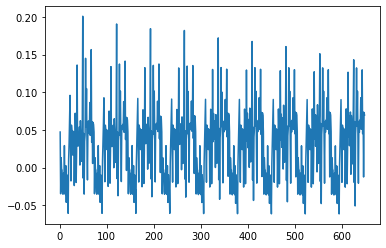

In [69]:
x = np.arange(1, len(resultados) + 1)
y = resultados

plt.plot(x, y)

In [ ]:
x = np.linspace(0.001, 0.1, 100).reshape(100, 1)
y = cost_function(x)

plt.plot(x, y)
plt.xlabel('Current I [A]')
plt.ylabel('Cost');

In [5]:
#Hacer dos dataframes, uno para moving avarage y otro para bollinger
ma_df= df.copy()
bb_df= df.copy()

In [6]:
### MOVING AVERAGE 
ma_df['moving_average_short'] = ma_df['close'].rolling(window=20).mean()
ma_df['moving_average_long'] = ma_df['close'].rolling(window=50).mean()

In [7]:
# Obtener las columnas necesarias 
final_ma = ma_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
final_bb = bb_df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']].copy()
final_bb['Operation'] = np.nan

In [8]:
## BOLLINGER BANDS
bb_df['moving_average'] = bb_df['close'].rolling(window=w_bb).mean()
bb_df['standar_deviation'] = bb_df['close'].rolling(window=w_bb).std()
bb_df['boolinger_upper'] = bb_df['moving_average'] + (bb_df['standar_deviation'] * sd_bb)
bb_df['boolinger_lower'] = bb_df['moving_average'] - (bb_df['standar_deviation'] * sd_bb)

In [13]:
### Constantes 
Capital= 100000
hoy = pd.Timestamp(datetime.datetime.today())
save_time_venta= ma_df['time'][0] - datetime.timedelta(hours=2)
save_time_compra= ma_df['time'][0] - datetime.timedelta(hours=2)

for t in range(1, len(ma_df)):
    # For Moving Average
    ## Compras
    if (ma_df.loc[t-1, 'moving_average_short'] < ma_df.loc[t-1, 'moving_average_long'] and
        ma_df.loc[t, 'moving_average_short'] > ma_df.loc[t, 'moving_average_long'] and
        ma_df.loc[t, 'close'] * num_acciones <= Capital):
        final_ma.loc[t, 'Operation'] = 'Comprar'
        final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
        # Cálculo stoploss & takeprofit
        final_ma.loc[t, 'Stoploss'] = max(ma_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                          ma_df.loc[t, 'close'] * (1 - pp_ma))
        final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 + pg_ma)
        # Actualización Capital
        Capital = Capital - (ma_df.loc[t, 'close'] * num_acciones)
        # Cerrando posición
        ## Precio Stoploss
        close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].close.to_list()
        close_sl.append([0])
        final_ma.loc[t, 'SL'] = close_sl[0]
        ## Precio Takeprofit
        close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].close.to_list()
        close_tp.append([0])
        final_ma.loc[t, 'TP'] = close_tp[0]
        ## Time Stoploss
        time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] <= final_ma.loc[t, 'Stoploss'])].time.to_list()
        time_sl.append([hoy])
        final_ma.loc[t, 'Date_SL'] = time_sl[0]
        ## Time Takeprofit
        time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] >= final_ma.loc[t, 'Takeprofit'])].time.to_list()
        time_tp.append([hoy])        
        final_ma.loc[t, 'Date_TP'] = time_tp[0]
        # Operación cerrada
        final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                     final_ma.loc[t, 'TP'],
                                     final_ma.loc[t, 'SL'])
        # Profit
        final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'CloseOp'] - final_ma.loc[t, 'close']) * num_acciones if \
                                     final_ma.loc[t, 'CloseOp'] != 0 else 0
        # Actualización Capital después de cerrar posición
        Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)
    ## Ventas
    elif (ma_df.loc[t-1, 'moving_average_short'] > ma_df.loc[t-1, 'moving_average_long'] and
          ma_df.loc[t, 'moving_average_short'] < ma_df.loc[t, 'moving_average_long'] and
          ma_df.loc[t, 'close'] * num_acciones <= Capital):
        final_ma.loc[t, 'Operation'] = 'Vender'
        final_ma.loc[t, 'exposure'] = ma_df.loc[t, 'close'] * num_acciones
        # Cálculo stoploss & takeprofit
        final_ma.loc[t, 'Stoploss'] = min(ma_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                          ma_df.loc[t, 'close'] * (1 + pp_ma))
        final_ma.loc[t, 'Takeprofit'] = ma_df.loc[t, 'close'] * (1 - pg_ma)
        # Actualización Capital
        Capital = Capital - ma_df.loc[t, 'close'] * num_acciones
        # Cerrando posición
        ## Precio Stoploss
        close_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].close.to_list()
        close_sl.append([0])
        final_ma.loc[t, 'SL'] = close_sl[0]
        ## Precio Takeprofit
        close_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].close.to_list()
        close_tp.append([0])
        final_ma.loc[t, 'TP'] = close_tp[0]
        ## Time Stoploss
        time_sl = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] >= final_ma.loc[t, 'Stoploss'])].time.to_list()
        time_sl.append([hoy])
        final_ma.loc[t, 'Date_SL'] = time_sl[0]
        ## Time Takeprofit
        time_tp = ma_df[(ma_df['time'] >= final_ma.loc[t, 'time']) &
                         (ma_df['close'] <= final_ma.loc[t, 'Takeprofit'])].time.to_list()
        time_tp.append([hoy])        
        final_ma.loc[t, 'Date_TP'] = time_tp[0]
        # Operación cerrada
        final_ma.loc[t, 'CloseOp'] = np.where(final_ma.loc[t, 'Date_SL'] > final_ma.loc[t, 'Date_TP'],
                                     final_ma.loc[t, 'TP'],
                                     final_ma.loc[t, 'SL'])
        # Profit
        final_ma.loc[t, 'Profit'] = (final_ma.loc[t, 'close'] - final_ma.loc[t, 'CloseOp']) * num_acciones if \
                                     final_ma.loc[t, 'CloseOp'] != 0 else 0
        # Actualización Capital después de cerrar posición
        Capital = Capital + (final_ma.loc[t, 'CloseOp'] * num_acciones)
    
    # For Boolinger Bands
    ## Compras
    if (bb_df.loc[t-1, 'close'] > bb_df.loc[t-1, 'boolinger_lower'] and
        bb_df.loc[t, 'close'] < bb_df.loc[t, 'boolinger_lower'] and
        bb_df.loc[t, 'close'] * num_acciones <= Capital and 
        bb_df.loc[t, 'time'] - save_time_compra > datetime.timedelta(hours=2)):
        
        save_time_compra = bb_df.loc[t, 'time']
        
        final_bb.loc[t, 'Operation'] = 'Comprar'
        
        final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
        # Cálculo stoploss & takeprofit
        final_bb.loc[t, 'Stoploss'] = max(bb_df.loc[t, 'close'] - ((Capital * 0.1) / num_acciones),
                                          bb_df.loc[t, 'close'] - (bb_df.loc[t, 'moving_average'] - bb_df.loc[t, 'close']))
        final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']           
        # Actualización Capital
        Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
        # Cerrando posición
        ## Precio Stoploss
        close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].close.to_list()
        close_sl.append([0])
        final_bb.loc[t, 'SL'] = close_sl[0]
        ## Precio Takeprofit
        close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].close.to_list()
        close_tp.append([0])
        final_bb.loc[t, 'TP'] = close_tp[0]
        ## Time Stoploss
        time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] <= final_bb.loc[t, 'Stoploss'])].time.to_list()
        time_sl.append([hoy])
        final_bb.loc[t, 'Date_SL'] = time_sl[0]
        ## Time Takeprofit
        time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] >= final_bb.loc[t, 'Takeprofit'])].time.to_list()
        time_tp.append([hoy])        
        final_bb.loc[t, 'Date_TP'] = time_tp[0]
        # Operación cerrada
        final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                     final_bb.loc[t, 'TP'],
                                     final_bb.loc[t, 'SL'])
        # Profit
        final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'CloseOp'] - final_bb.loc[t, 'close']) * num_acciones if \
                                     final_bb.loc[t, 'CloseOp'] != 0 else 0
        # Actualización Capital después de cerrar posición
        Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones)
    ## Ventas
    elif (bb_df.loc[t-1, 'close'] < bb_df.loc[t-1, 'boolinger_upper'] and
          bb_df.loc[t, 'close'] > bb_df.loc[t, 'boolinger_upper'] and
          bb_df.loc[t, 'close'] * num_acciones <= Capital and
          bb_df.loc[t, 'time'] - save_time_venta > datetime.timedelta(hours=2)):
        
        save_time_venta = bb_df.loc[t, 'time']
        
        final_bb.loc[t, 'Operation'] = 'Vender'
        final_bb.loc[t, 'exposure'] = bb_df.loc[t, 'close'] * num_acciones
        # Cálculo stoploss & takeprofit
        final_bb.loc[t, 'Stoploss'] = min(bb_df.loc[t, 'close'] + ((Capital * 0.1) / num_acciones),
                                          bb_df.loc[t, 'close'] + (bb_df.loc[t, 'close'] - bb_df.loc[t, 'moving_average']))
        final_bb.loc[t, 'Takeprofit'] = bb_df.loc[t, 'moving_average']  
        # Actualización Capital
        Capital = Capital - bb_df.loc[t, 'close'] * num_acciones
        # Cerrando posición
        ## Precio Stoploss
        close_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].close.to_list()
        close_sl.append([0])
        final_bb.loc[t, 'SL'] = close_sl[0]
        ## Precio Takeprofit
        close_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].close.to_list()
        close_tp.append([0])
        final_bb.loc[t, 'TP'] = close_tp[0]
        ## Time Stoploss
        time_sl = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] >= final_bb.loc[t, 'Stoploss'])].time.to_list()
        time_sl.append([hoy])
        final_bb.loc[t, 'Date_SL'] = time_sl[0]
        ## Time Takeprofit
        time_tp = bb_df[(bb_df['time'] >= final_bb.loc[t, 'time']) &
                         (bb_df['close'] <= final_bb.loc[t, 'Takeprofit'])].time.to_list()
        time_tp.append([hoy])        
        final_bb.loc[t, 'Date_TP'] = time_tp[0]
        # Operación cerrada
        final_bb.loc[t, 'CloseOp'] = np.where(final_bb.loc[t, 'Date_SL'] > final_bb.loc[t, 'Date_TP'],
                                     final_bb.loc[t, 'TP'],
                                     final_bb.loc[t, 'SL'])
        # Profit
        final_bb.loc[t, 'Profit'] = (final_bb.loc[t, 'close'] - final_bb.loc[t, 'CloseOp']) * num_acciones if \
                                     final_bb.loc[t, 'CloseOp'] != 0 else 0
        # Actualización Capital después de cerrar posición
        Capital = Capital + (final_bb.loc[t, 'CloseOp'] * num_acciones) 

In [14]:
earnings_df_ma = final_ma.dropna(subset=['Operation'])
earnings_df_ma.reset_index(drop=True, inplace=True)
earnings_df_ma

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,Stoploss,Takeprofit,SL,TP,Date_SL,Date_TP,CloseOp,Profit
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,1.228508,1.192376,1.22855,1.19209,2018-01-15 12:15:00.000000,2018-01-09 13:00:00.000000,1.19209,1.233
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,1.181909,1.218090,1.18169,1.21815,2018-05-16 01:45:00.000000,2018-01-12 22:30:00.000000,1.21815,1.212
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,1.229049,1.192900,1.22919,1.19278,2018-01-17 02:30:00.000000,2018-01-09 12:30:00.000000,1.19278,1.217
3,2018-01-04 08:00:00,1.20185,1.20274,1.20167,1.20254,4489,6,897800000,Comprar,120.254,1.178489,1.214565,1.17839,1.21475,2018-05-16 13:30:00.000000,2018-01-12 17:45:00.000000,1.21475,1.221
4,2018-01-05 01:15:00,1.20688,1.20704,1.20663,1.20678,1765,16,353000000,Vender,120.678,1.230916,1.194712,1.23093,1.19421,2018-01-24 01:30:00.000000,2018-01-09 10:00:00.000000,1.19421,1.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2018-12-26 09:00:00,1.14044,1.14059,1.14038,1.14045,2358,15,353700000,Vender,114.045,1.163259,1.129045,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
537,2018-12-26 19:15:00,1.13962,1.13962,1.13845,1.13869,12066,15,1809900000,Comprar,113.869,1.115916,1.150077,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
538,2018-12-26 20:00:00,1.13550,1.13604,1.13543,1.13597,11745,15,1761750000,Vender,113.597,1.158689,1.124610,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
539,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,1.115279,1.149420,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000


In [16]:
earnings_df_ma['exposure'].sum(), \
earnings_df_ma['Profit'].sum(), \
(earnings_df_ma['Profit'].sum() / earnings_df_ma['exposure'].sum()) * 100

(63819.023, 97.4550000000003, 0.15270525216282343)

In [17]:
earnings_df_bb = final_bb.dropna(subset=['Operation'])
earnings_df_bb.reset_index(drop=True, inplace=True)
earnings_df_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,Stoploss,Takeprofit,SL,TP,Date_SL,Date_TP,CloseOp,Profit
0,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,Comprar,120.318,1.201206,1.205154,1.20083,1.20538,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,1.20083,-0.235
1,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,Comprar,120.303,1.200932,1.205128,1.20083,1.20538,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,1.20083,-0.220
2,2018-01-03 17:00:00,1.20174,1.20174,1.20050,1.20083,7536,6,1507200000,Comprar,120.083,1.197352,1.204308,1.19710,1.20484,2018-01-08 14:45:00.000000,2018-01-04 12:15:00.000000,1.20484,0.401
3,2018-01-04 11:45:00,1.20349,1.20454,1.20325,1.20428,6585,6,1317000000,Vender,120.428,1.206543,1.202017,1.20657,1.20150,2018-01-04 14:30:00.000000,2018-01-08 07:30:00.000000,1.20657,-0.229
4,2018-01-05 12:15:00,1.20500,1.20509,1.20437,1.20453,5047,6,1009400000,Comprar,120.453,1.202514,1.206546,1.20211,1.20668,2018-01-05 17:30:00.000000,2018-01-12 09:30:00.000000,1.20211,-0.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2018-12-24 16:15:00,1.14150,1.14263,1.14134,1.14213,13071,15,1960650000,Vender,114.213,1.145489,1.138771,1.14589,1.13855,2018-12-28 04:30:00.000000,2018-12-26 10:30:00.000000,1.13855,0.358
484,2018-12-26 19:30:00,1.13869,1.13870,1.13676,1.13720,12869,15,1930350000,Comprar,113.720,1.134417,1.139983,0.00000,1.14009,2021-11-25 21:02:16.877101,2018-12-27 12:30:00.000000,1.14009,0.289
485,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,Vender,114.339,1.148837,1.137943,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
486,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,Vender,114.227,1.146450,1.138090,1.14649,0.00000,2018-12-28 05:00:00.000000,2021-11-25 21:02:16.877101,1.14649,-0.422


In [18]:
earnings_df_bb['exposure'].sum(), \
earnings_df_bb['Profit'].sum(), \
(earnings_df_bb['Profit'].sum() / earnings_df_bb['exposure'].sum()) * 100

(57746.939, -23.17499999999997, -0.04013199729945854)

In [19]:
earnings_df_bb['exposure'].sum() + earnings_df_ma['exposure'].sum()

121565.962

In [20]:
earnings_df_bb.rename(columns={'Operation': 'Operation_bb', 
                       'exposure': 'exposure_bb',
                       'Stoploss': 'Stoploss_bb',
                       'Takeprofit': 'Takeprofit_bb',
                       'SL': 'SL_bb',
                       'TP': 'TP_bb',
                       'Date_SL': 'Date_SL_bb',
                       'Date_TP': 'Date_TP_bb',
                       'CloseOp': 'CloseOp_bb',
                       'Profit': 'Profit_bb'}, inplace=True)
earnings_df_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation_bb,exposure_bb,Stoploss_bb,Takeprofit_bb,SL_bb,TP_bb,Date_SL_bb,Date_TP_bb,CloseOp_bb,Profit_bb
0,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,Comprar,120.318,1.201206,1.205154,1.20083,1.20538,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,1.20083,-0.235
1,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,Comprar,120.303,1.200932,1.205128,1.20083,1.20538,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,1.20083,-0.220
2,2018-01-03 17:00:00,1.20174,1.20174,1.20050,1.20083,7536,6,1507200000,Comprar,120.083,1.197352,1.204308,1.19710,1.20484,2018-01-08 14:45:00.000000,2018-01-04 12:15:00.000000,1.20484,0.401
3,2018-01-04 11:45:00,1.20349,1.20454,1.20325,1.20428,6585,6,1317000000,Vender,120.428,1.206543,1.202017,1.20657,1.20150,2018-01-04 14:30:00.000000,2018-01-08 07:30:00.000000,1.20657,-0.229
4,2018-01-05 12:15:00,1.20500,1.20509,1.20437,1.20453,5047,6,1009400000,Comprar,120.453,1.202514,1.206546,1.20211,1.20668,2018-01-05 17:30:00.000000,2018-01-12 09:30:00.000000,1.20211,-0.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2018-12-24 16:15:00,1.14150,1.14263,1.14134,1.14213,13071,15,1960650000,Vender,114.213,1.145489,1.138771,1.14589,1.13855,2018-12-28 04:30:00.000000,2018-12-26 10:30:00.000000,1.13855,0.358
484,2018-12-26 19:30:00,1.13869,1.13870,1.13676,1.13720,12869,15,1930350000,Comprar,113.720,1.134417,1.139983,0.00000,1.14009,2021-11-25 21:02:16.877101,2018-12-27 12:30:00.000000,1.14009,0.289
485,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,Vender,114.339,1.148837,1.137943,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
486,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,Vender,114.227,1.146450,1.138090,1.14649,0.00000,2018-12-28 05:00:00.000000,2021-11-25 21:02:16.877101,1.14649,-0.422


In [36]:
df_ma_bb = df.merge(earnings_df_ma[['time', 'Operation', 'exposure',
                                                'Stoploss', 'Takeprofit', 'SL',
                                                'TP', 'Date_SL', 'Date_TP', 
                                                'CloseOp', 'Profit']], 
                                left_on='time', right_on='time', how='outer').merge(earnings_df_bb[['time', 
                                                'Operation_bb', 'exposure_bb',
                                                'Stoploss_bb', 'Takeprofit_bb', 'SL_bb',
                                                'TP_bb', 'Date_SL_bb', 'Date_TP_bb', 
                                                'CloseOp_bb', 'Profit_bb']], 
                                left_on='time', right_on='time', how='outer')
df_ma_bb.fillna(0, inplace=True)
df_ma_bb.sort_values(by='time', inplace=True, ignore_index=True)
df_ma_bb = df_ma_bb[(df_ma_bb['Operation']!=0) | (df_ma_bb['Operation_bb']!=0)].reset_index(drop=True)
df_ma_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,...,Operation_bb,exposure_bb,Stoploss_bb,Takeprofit_bb,SL_bb,TP_bb,Date_SL_bb,Date_TP_bb,CloseOp_bb,Profit_bb
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,...,0,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,...,0,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,...,0,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000
3,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,0,0.000,...,Comprar,120.318,1.201206,1.205154,1.20083,1.20538,2018-01-03 17:00:00,2018-01-04 12:30:00,1.20083,-0.235
4,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,0,0.000,...,Comprar,120.303,1.200932,1.205128,1.20083,1.20538,2018-01-03 17:00:00,2018-01-04 12:30:00,1.20083,-0.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,...,0,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000
1004,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,0,0.000,...,Vender,114.339,1.148837,1.137943,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000
1005,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,0,0.000,...,Vender,114.227,1.146450,1.138090,1.14649,0.00000,2018-12-28 05:00:00,2021-11-25 21:02:16.877101,1.14649,-0.422
1006,2018-12-28 05:00:00,1.14609,1.14650,1.14558,1.14649,14866,15,2229900000,0,0.000,...,Vender,114.649,1.151859,1.141121,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000


In [37]:
df_ma_bb["Operation"] = df_ma_bb["Operation"].astype("str")
df_ma_bb["Operation_bb"] = df_ma_bb["Operation_bb"].astype("str")
df_ma_bb["Duplicates"] = np.where((((df_ma_bb['Operation']=="Comprar") & (df_ma_bb['Operation_bb']=="Vender")) | \
                                   ((df_ma_bb['Operation']=="Vender") & (df_ma_bb['Operation_bb']=="Comprar"))), 1, 0)
                            
df_ma_bb = df_ma_bb[df_ma_bb['Duplicates']==0].copy()
df_ma_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,...,exposure_bb,Stoploss_bb,Takeprofit_bb,SL_bb,TP_bb,Date_SL_bb,Date_TP_bb,CloseOp_bb,Profit_bb,Duplicates
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,...,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000,0
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,...,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000,0
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,...,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000,0
3,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,0,0.000,...,120.318,1.201206,1.205154,1.20083,1.20538,2018-01-03 17:00:00,2018-01-04 12:30:00,1.20083,-0.235,0
4,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,0,0.000,...,120.303,1.200932,1.205128,1.20083,1.20538,2018-01-03 17:00:00,2018-01-04 12:30:00,1.20083,-0.220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,...,0.000,0.000000,0.000000,0.00000,0.00000,0,0,0.00000,0.000,0
1004,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,0,0.000,...,114.339,1.148837,1.137943,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000,0
1005,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,0,0.000,...,114.227,1.146450,1.138090,1.14649,0.00000,2018-12-28 05:00:00,2021-11-25 21:02:16.877101,1.14649,-0.422,0
1006,2018-12-28 05:00:00,1.14609,1.14650,1.14558,1.14649,14866,15,2229900000,0,0.000,...,114.649,1.151859,1.141121,0.00000,0.00000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,0.00000,0.000,0


In [38]:
list_columns = ['exposure', 'Stoploss', 'Takeprofit', 'SL',
                'TP', 'CloseOp', 'Profit']
for i in list_columns:
    df_ma_bb[i+'_final'] = df_ma_bb[i] + df_ma_bb[i+'_bb']

df_ma_bb['Date_SL_final'] = np.where(df_ma_bb['Date_SL']==0,df_ma_bb['Date_SL_bb'], df_ma_bb['Date_SL'])
df_ma_bb['Date_TP_final'] = np.where(df_ma_bb['Date_TP']==0,df_ma_bb['Date_TP_bb'], df_ma_bb['Date_TP'])
    
df_ma_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,...,Duplicates,exposure_final,Stoploss_final,Takeprofit_final,SL_final,TP_final,CloseOp_final,Profit_final,Date_SL_final,Date_TP_final
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,...,0,120.442,1.228508,1.192376,1.22855,1.19209,1.19209,1.233,2018-01-15 12:15:00.000000,2018-01-09 13:00:00.000000
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,...,0,120.603,1.181909,1.218090,1.18169,1.21815,1.21815,1.212,2018-05-16 01:45:00.000000,2018-01-12 22:30:00.000000
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,...,0,120.495,1.229049,1.192900,1.22919,1.19278,1.19278,1.217,2018-01-17 02:30:00.000000,2018-01-09 12:30:00.000000
3,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,0,0.000,...,0,120.318,1.201206,1.205154,1.20083,1.20538,1.20083,-0.235,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000
4,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,0,0.000,...,0,120.303,1.200932,1.205128,1.20083,1.20538,1.20083,-0.220,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,...,0,113.804,1.115279,1.149420,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101
1004,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,0,0.000,...,0,114.339,1.148837,1.137943,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101
1005,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,0,0.000,...,0,114.227,1.146450,1.138090,1.14649,0.00000,1.14649,-0.422,2018-12-28 05:00:00.000000,2021-11-25 21:02:16.877101
1006,2018-12-28 05:00:00,1.14609,1.14650,1.14558,1.14649,14866,15,2229900000,0,0.000,...,0,114.649,1.151859,1.141121,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101


# 3 MAD

## Sharpe

In [40]:
df_ma_bb['Profit_final_acum'] = df_ma_bb['Profit_final'].cumsum() 
df_ma_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,...,exposure_final,Stoploss_final,Takeprofit_final,SL_final,TP_final,CloseOp_final,Profit_final,Date_SL_final,Date_TP_final,Profit_final_acum
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,...,120.442,1.228508,1.192376,1.22855,1.19209,1.19209,1.233,2018-01-15 12:15:00.000000,2018-01-09 13:00:00.000000,1.233
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,...,120.603,1.181909,1.218090,1.18169,1.21815,1.21815,1.212,2018-05-16 01:45:00.000000,2018-01-12 22:30:00.000000,2.445
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,...,120.495,1.229049,1.192900,1.22919,1.19278,1.19278,1.217,2018-01-17 02:30:00.000000,2018-01-09 12:30:00.000000,3.662
3,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,0,0.000,...,120.318,1.201206,1.205154,1.20083,1.20538,1.20083,-0.235,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,3.427
4,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,0,0.000,...,120.303,1.200932,1.205128,1.20083,1.20538,1.20083,-0.220,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,3.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,...,113.804,1.115279,1.149420,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.974
1004,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,0,0.000,...,114.339,1.148837,1.137943,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.974
1005,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,0,0.000,...,114.227,1.146450,1.138090,1.14649,0.00000,1.14649,-0.422,2018-12-28 05:00:00.000000,2021-11-25 21:02:16.877101,70.552
1006,2018-12-28 05:00:00,1.14609,1.14650,1.14558,1.14649,14866,15,2229900000,0,0.000,...,114.649,1.151859,1.141121,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.552


In [41]:
 # Sharpe ratio original
ret =df_ma_bb['Profit_final_acum'].pct_change().dropna()
mean_ret = np.mean(ret)
rf = 0.05
desvest = np.std(ret)
sharpe_rat = (mean_ret - rf)/desvest

In [42]:
# Drawdown
drawdown_cap = df_ma_bb['Profit_final'].min()
#a = df_ma_bb['time'].where(df_ma_bb['Profit_final'] == drawdown_cap).dropna()
#b = df_ma_bb['Time_2'].where(param_data['Profit_final'] == drawdown_cap).dropna()

In [43]:
# Drawup
drawup_cap = df_ma_bb['Profit_final'].max()
#c = param_data['Time'].where(param_data['Profit'] == drawup_cap).dropna()
#d = param_data['Time_2'].where(param_data['Profit'] == drawup_cap).dropna()

In [44]:
# Hacer tabla de métricas

est_mad = {'Métrica' : ['Sharpe', 'Drawdown','Drawup'],
               '' : ['Cantidad','DrawDown $ (capital)','DrawUp $ (capital)'],
               'Valor' : [sharpe_rat, drawdown_cap, drawup_cap],
               'Descripción' : ['Sharpe Ratio Fórmula Original',
                               'Máxima pérdida flotante registrada',
                                'Máxima ganancia flotante registrada']
              }
# Crear DataFrame
df_est_mad = pd.DataFrame(est_mad)
df_est_mad

,Métrica,,Valor,Descripción
0,Sharpe,Cantidad,-0.054705,Sharpe Ratio Fórmula Original
1,Drawdown,DrawDown $ (capital),-2.793000,Máxima pérdida flotante registrada
2,Drawup,DrawUp $ (capital),1.698000,Máxima ganancia flotante registrada


## Graficas

In [45]:
# Gráficas
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [47]:
df_ma_bb

,time,open,high,low,close,tick_volume,spread,real_volume,Operation,exposure,...,exposure_final,Stoploss_final,Takeprofit_final,SL_final,TP_final,CloseOp_final,Profit_final,Date_SL_final,Date_TP_final,Profit_final_acum
0,2018-01-02 19:45:00,1.20485,1.20495,1.20407,1.20442,4693,6,938600000,Vender,120.442,...,120.442,1.228508,1.192376,1.22855,1.19209,1.19209,1.233,2018-01-15 12:15:00.000000,2018-01-09 13:00:00.000000,1.233
1,2018-01-03 01:00:00,1.20567,1.20614,1.20564,1.20603,3841,16,768200000,Comprar,120.603,...,120.603,1.181909,1.218090,1.18169,1.21815,1.21815,1.212,2018-05-16 01:45:00.000000,2018-01-12 22:30:00.000000,2.445
2,2018-01-03 06:15:00,1.20479,1.20497,1.20479,1.20495,1693,13,338600000,Vender,120.495,...,120.495,1.229049,1.192900,1.22919,1.19278,1.19278,1.217,2018-01-17 02:30:00.000000,2018-01-09 12:30:00.000000,3.662
3,2018-01-03 10:00:00,1.20386,1.20395,1.20306,1.20318,6393,6,1278600000,0,0.000,...,120.318,1.201206,1.205154,1.20083,1.20538,1.20083,-0.235,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,3.427
4,2018-01-03 12:15:00,1.20361,1.20367,1.20287,1.20303,5430,6,1086000000,0,0.000,...,120.303,1.200932,1.205128,1.20083,1.20538,1.20083,-0.220,2018-01-03 17:00:00.000000,2018-01-04 12:30:00.000000,3.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2018-12-27 05:45:00,1.13827,1.13832,1.13804,1.13804,5668,15,850200000,Comprar,113.804,...,113.804,1.115279,1.149420,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.974
1004,2018-12-27 16:45:00,1.14038,1.14355,1.13974,1.14339,15790,15,2368500000,0,0.000,...,114.339,1.148837,1.137943,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.974
1005,2018-12-27 19:00:00,1.14112,1.14244,1.14102,1.14227,14300,15,2145000000,0,0.000,...,114.227,1.146450,1.138090,1.14649,0.00000,1.14649,-0.422,2018-12-28 05:00:00.000000,2021-11-25 21:02:16.877101,70.552
1006,2018-12-28 05:00:00,1.14609,1.14650,1.14558,1.14649,14866,15,2229900000,0,0.000,...,114.649,1.151859,1.141121,0.00000,0.00000,0.00000,0.000,2021-11-25 21:02:16.877101,2021-11-25 21:02:16.877101,70.552


In [57]:
#Precio
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time'], y=df['close'],
                    mode='lines',
                    name='Close moving average',
                    line=dict(color='royalblue', width=3)))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [50]:
# EXPOSURE
fig = go.Figure([go.Scatter(x= df_ma_bb['time'], y= df_ma_bb['exposure_final'],
                         line = dict(color='teal', width=3))])
fig.update_layout(title='Exposure',
                   xaxis_title='Date',
                   yaxis_title='$')
fig.show()

In [51]:
# Profit acum
fig = go.Figure([go.Scatter(x= df_ma_bb['time'], y= df_ma_bb['Profit_final_acum'],
                         line = dict(color='indigo', width=3))])
fig.update_layout(title='Profit Acumulado',
                   xaxis_title='Date',
                   yaxis_title='$')
fig.show()

In [59]:
ventas_ma = df_ma_bb[df_ma_bb['Operation']=='Vender']
ventas_bb = df_ma_bb[df_ma_bb['Operation_bb']=='Vender']

In [63]:
# SL MA
fig = go.Figure()
fig.add_trace(go.Scatter(x= ventas_ma['time'], y= ventas_ma['close'],
                    mode='lines',
                    name='Close',
                    line=dict(color='gold', width=4)))

fig.add_trace(go.Scatter(x= ventas_ma['time'], y= ventas_ma['Stoploss'],
                    mode='lines', name='Stoploss',
                    line=dict(color='firebrick', width=3)))

fig.add_trace(go.Scatter(x= ventas_ma['time'], y= ventas_ma['Takeprofit'],
                    mode='lines', name='Takeprofit',
                    line=dict(color='forestgreen', width=3)))
# Edit the layout
fig.update_layout(title='Close vs Stoploss',
                   xaxis_title='Date',
                   yaxis_title='Values')

fig.show()

In [64]:
# SL BB
fig = go.Figure()
fig.add_trace(go.Scatter(x= ventas_bb['time'], y= ventas_bb['close'],
                    mode='lines',
                    name='Close',
                    line=dict(color='gold', width=4)))

fig.add_trace(go.Scatter(x= ventas_bb['time'], y= ventas_bb['Stoploss_bb'],
                    mode='lines', name='Stoploss',
                    line=dict(color='firebrick', width=3)))

fig.add_trace(go.Scatter(x= ventas_bb['time'], y= ventas_bb['Takeprofit_bb'],
                    mode='lines', name='Takeprofit',
                    line=dict(color='forestgreen', width=3)))
# Edit the layout
fig.update_layout(title='Close vs Stoploss',
                   xaxis_title='Date',
                   yaxis_title='Values')

fig.show()

In [71]:
compras_ma = df_ma_bb[df_ma_bb['Operation']=='Comprar']
compras_bb = df_ma_bb[df_ma_bb['Operation_bb']=='Comprar']

In [75]:
# TP MA
fig = go.Figure()
fig.add_trace(go.Scatter(x=compras_ma['time'], y=compras_ma['close'],
                    mode='lines',
                    name='Close',
                    line=dict(color='olivedrab', width=4)))

fig.add_trace(go.Scatter(x=compras_ma['time'], y=compras_ma['Takeprofit'],
                    mode='lines', name='Takeprofit',
                    line=dict(color='darkorange', width=3)))

fig.add_trace(go.Scatter(x=compras_ma['time'], y=compras_ma['Stoploss'],
                    mode='lines', name='Stoploss',
                    line=dict(color='cadetblue', width=3)))

# Edit the layout
fig.update_layout(title='Close vs Takeprofit',
                   xaxis_title='Date',
                   yaxis_title='Values')

fig.show()

In [76]:
# TP BB
fig = go.Figure()
fig.add_trace(go.Scatter(x=compras_bb['time'], y=compras_bb['close'],
                    mode='lines',
                    name='Close',
                    line=dict(color='olivedrab', width=4)))

fig.add_trace(go.Scatter(x=compras_bb['time'], y=compras_bb['Takeprofit_bb'],
                    mode='lines', name='Takeprofit',
                    line=dict(color='darkorange', width=3)))

fig.add_trace(go.Scatter(x=compras_bb['time'], y=compras_bb['Stoploss_bb'],
                    mode='lines', name='Stoploss',
                    line=dict(color='cadetblue', width=3)))

# Edit the layout
fig.update_layout(title='Close vs Takeprofit',
                   xaxis_title='Date',
                   yaxis_title='Values')

fig.show()

# <font color= #6B6B6B> 4. A particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# A particular process that is relevant for the work you are presenting.

<br>

# <font color= #6B6B6B> 5. Another particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>